<a href="https://colab.research.google.com/github/andrey-gl/study2020/blob/master/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Модель линейной регрессии

Часто требуется выявить статистическую зависимость одних случайных величин от других. Для зависимых случайных величин имеет смысл рассмотреть математическое ожидание одной из них при фиксированном значении другой и выяснить, как влияет на среднее значение первой величины изменение значений второй.

Пусть случайная величина $X$ зависит от случайного вектора $Z$:
$$E(X|Z=z) = f(z)$$
В этом случае функция $f(z)$ назвается линией регрессии. Обозначи $\varepsilon = X - E(X|Z=z) = X - f(z)$ – ошибка регрессии. Про распределение $\varepsilon$ обычно что-то предполагают, чтобы была возможность линию регрессии найти. В этом случае модель регресси можно переписать в виде: $X = f(z) + \varepsilon$.

Задачей регрессионно модели заключается в том, чтобы по значениям $X$ и $z$ в рамках предположения о распределении $\varepsilon$ оценить функцию $f(z)$.

Рассмотрим наиболее распространенный случай, когда функция $f(z)$ линейна.

Итак, пусть наблюдение $X$ – случайный вектор из $\mathbb{R}^n$, причем $X = Z \theta + \varepsilon$,
где:
1. $Z = (Z_1,\ldots,Z_k)$ – набор факторов, каждый из которых есть вектор-столбец;
2. $\theta = (\theta_1,\ldots,\theta_k)^{T}$ – набор параметров;
3. $\varepsilon$ – случайный вектор, такой что ${\sf E}\varepsilon = 0$, ${\sf D}\varepsilon = \sigma^2 I_n$, где ${\sf D}\varepsilon$ – ковариационная матрица вектора $\varepsilon$, $I_n$ – единичная диагональная матрица размера $n\times n.$

Задача стоит в оценивании $\theta \in \mathbb R^k$.

Поставленная задача оценивания вектора $\theta$ решается с помощью метода наименьших квадратов. Оценка по методу наименьших квадратов равна
$$
\hat\theta=\arg \min\limits_{\theta} \|X - Z\theta\|^2.
$$

Выведем явную формулу для оценки $\hat\theta$:

$$
\|X-Z\theta\|^2 = (X-Z\theta)^T(X-Z\theta) = X^TX - X^T Z\theta - \theta^T Z^T X+\theta^T Z^T Z \theta = X^T X - 2 X^T Z\theta + \theta^T (Z^TZ)\theta.
$$
Продифференцируем полученное выражение по $\theta_i$ для каждого $i\in\{1,\ldots,k\}$ и приравняем эти производные к нулю, чтобы найти искомый аргумент, при котором достигается минимум:
$$
-2(X^TZ)_i + 2(\theta^T Z^TZ)_i = 0,
$$
$$
X^TZ - \theta^TZ^TZ = 0,
$$
$$
\widehat{\theta} = (Z^TZ)^{-1}Z^T X.
$$


Из свойства 1 легко получить значения вектора математических ожиданий и ковариационную матрицу оценки: ${\sf E}_{\theta,\sigma^2} \widehat{\theta} = \theta$, ${\sf D}_{\theta,\sigma^2}\widehat{\theta} = \sigma^2 (Z^T Z)^{-1}.$ Таким образом, оценка по методу наименьших квадратов является несмещенной.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
#Generating data

n = 100
e1 = np.random.normal(0,0.4,n)
x1 = np.random.normal(0,1,n)
x2 = x1 + e1
x3 = np.random.normal(0,1,n)

e = np.random.normal(0,0.2,n)

y0 = 0.2*x1 - 0.5*x2 + 0.4*x3 + e

x = pd.DataFrame(data = np.transpose(np.array([x1, x2, x3])))
y = pd.DataFrame(data = np.transpose(y0))

In [ ]:
x.corr()

,0,1,2
0,1.000000,0.928723,0.070416
1,0.928723,1.000000,0.100718
2,0.070416,0.100718,1.000000


In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(x, y)
lm.coef_, lm.score(x, y)

(array([[ 0.1217202 , -0.45147588,  0.41968673]]), 0.8849710546071363)

##Многообразие линейных моделей

Мы можем обобщить нашу линейную регрессию следующей моделью:
$$X^* = Z^* \theta + \varepsilon,$$
где $X^* = g_1(X), Z^* = g_2(Z)$ – некоторые произвольные функции.

Таким образом, мы можем использовать модель линейной регрессии над в общем случае нелинейно преобразованными данными случайными величинами.

Кроме того, в качестве факторов $Z_i$ мы можем неоднократно использовать преобразования исходных независимых фаторов. В том случае, когда преобразованая зависимая переменная является экспоненциальной, то речь идет о так называемой обощенной линейной модели (GLM).

Модели также отличаются в зависимости от оптиизированного функционала.

**Регуляризация.** Отельно следует упомянуть о так называемой регуляризации. 


In [ ]:
# загружаем файл с данными
df = pd.read_csv("sample_data/regr1.csv")
# x - таблица с исходными данными факторов (x1, x2, x3)
x = df.iloc[:,:-1]
# y - таблица с исходными данными зависимой переменной
y = df.iloc[:,-1]
df.head()

,Unnamed: 0,x1,x2,x3,y
0,0,17.486288,185.505167,0.0,161.600365
1,1,32.353509,182.540139,0.0,157.077034
2,2,20.629644,190.742210,0.0,155.571362
3,4,29.396574,169.742980,0.0,147.232886
4,5,19.673511,191.574909,0.0,149.530893


In [ ]:
lm = LinearRegression()
# запускаем расчет параметров для указанных данных
lm.fit(x, y)
# и выведем параметры рассчитанной модели
lm.coef_, lm.score(x, y)

(array([-1.27631893e-02,  6.94554429e-02,  7.13624013e-01,  2.20245599e+01]),
 0.8527198548675538)

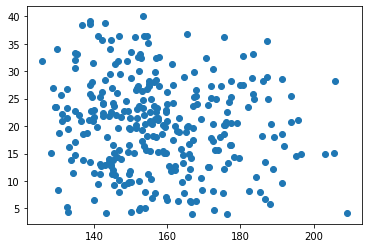

In [ ]:
plt.scatter(y, x['x1'])
plt.show()

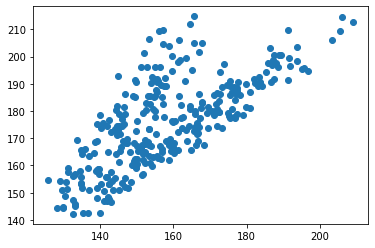

In [ ]:
plt.scatter(y, x['x2'])
plt.show()

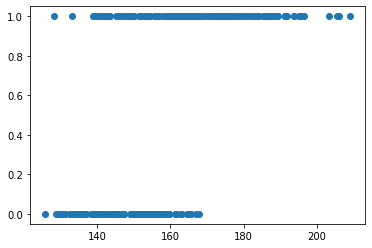

In [ ]:
plt.scatter(y, x['x3'])
plt.show()

In [ ]:
x["x4"] = x["x2"] * x["x3"] 
x.head()

,Unnamed: 0,x1,x2,x3,x4
0,0,17.486288,185.505167,0.0,0.0
1,1,32.353509,182.540139,0.0,0.0
2,2,20.629644,190.742210,0.0,0.0
3,4,29.396574,169.742980,0.0,0.0
4,5,19.673511,191.574909,0.0,0.0


In [ ]:
lm = LinearRegression()
# запускаем расчет параметров для указанных данных
lm.fit(x, y)
# и выведем параметры рассчитанной модели
lm.coef_, lm.score(x, y)

(array([-1.00422541e-02,  1.61544479e-02,  4.77649028e-01, -6.57178581e+01,
         4.95203284e-01]), 0.9106777847467751)

#Методы машинного обучения

https://novator.io/kejsy/fakticheskaya-raznitsa-mezhdu-statistikoj-i-mashinnym-obucheniem

1. Обучение с учителем — для каждого прецедента задаётся пара «ситуация, требуемое решение».
2. Обучение без учителя — для каждого прецедента задаётся только «ситуация», требуется сгруппировать объекты в кластеры, используя данные о попарном сходстве объектов, и/или понизить размерность данных.
3. Обучение с подкреплением — для каждого прецедента имеется пара «ситуация, принятое решение».

## Пример. Прогноз погоды

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
df=pd.read_csv('sample_data/weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
df['Formatted Date']=pd.to_datetime(df['Formatted Date'],utc=True)
df['year']=df['Formatted Date'].dt.year
df['month']=df['Formatted Date'].dt.month
df['day']=df['Formatted Date'].dt.day

In [ ]:
df.rename(columns={'Temperature (C)':'Temperature','Apparent Temperature (C)':'Apparent Temperature'},inplace=True)
del df['Loud Cover']

In [ ]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature,Apparent Temperature,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,year,month,day
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,2006,3,31
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,2006,3,31
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,2006,4,1
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,2006,4,1
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,2006,4,1


In [ ]:
df.describe()

,Temperature,Apparent Temperature,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.00000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956,2011.00029,6.523001,15.727100
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906,3.16216,3.448501,8.802216
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000,2005.00000,1.000000,1.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000,2008.00000,4.000000,8.000000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000,2011.00000,7.000000,16.000000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000,2014.00000,10.000000,23.000000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000,2016.00000,12.000000,31.000000


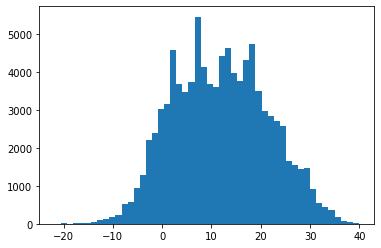

In [ ]:
plt.hist(df['Temperature'], bins = 50)
plt.show()

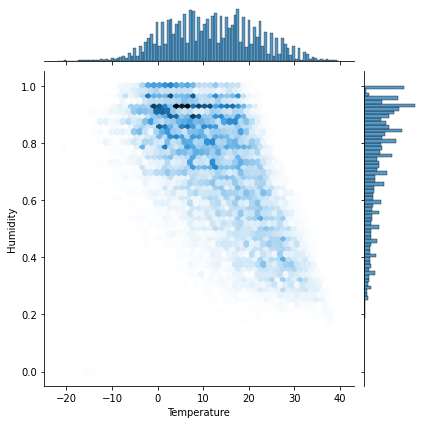

In [ ]:
sns.jointplot(x='Temperature',y='Humidity',data=df,kind='hex')
plt.show()

(11.0, 0.0)

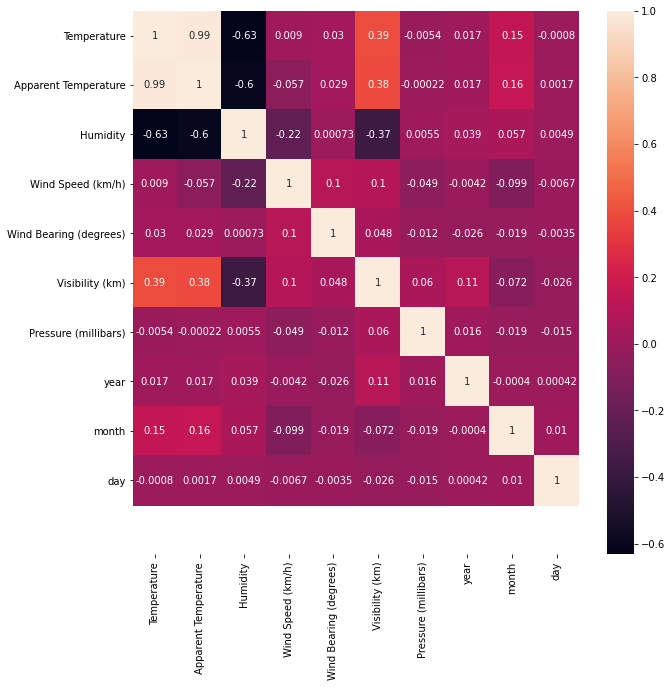

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.heatmap(df.corr(),annot=True)
ax.set_ylim(11,0)

In [ ]:
x=df.iloc[:,4:10]
y=df.iloc[:,3]
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=100)


In [ ]:
y.head()

0    9.472222
1    9.355556
2    9.377778
3    8.288889
4    8.755556
Name: Temperature, dtype: float64

In [ ]:
x.head()

,Apparent Temperature,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [ ]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.coef_

array([ 8.72392601e-01, -1.42064163e+00,  7.96256781e-02, -4.03335514e-04,
        8.23561737e-03, -2.03445199e-04])

In [ ]:
prd=lm.predict(x_test)

In [ ]:
prd=lm.predict(x_test)
